In [438]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [439]:
pd.__version__

'1.5.3'

In [440]:
housing = pd.read_csv(r'C:\Users\pc\Documents\housing.csv')

In [441]:
housing.shape

(20640, 10)

In [442]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


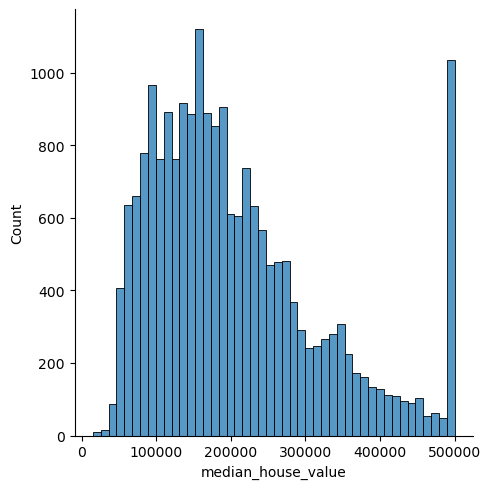

In [443]:
sns.displot(housing.median_house_value)

In [444]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [445]:
df = housing.loc[(housing['ocean_proximity'] == 'INLAND') | (housing['ocean_proximity'] == '<1H OCEAN'), :]
df['ocean_proximity'].value_counts()

<1H OCEAN    9136
INLAND       6551
Name: ocean_proximity, dtype: int64

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [447]:
# total bedroom with nan

In [448]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]


In [449]:
df.population.median()

1195.0

In [450]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [451]:
# df shuffle / log
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [452]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [453]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [454]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [455]:
#Q3

In [456]:
# fillna total_bedrooms with mean

In [457]:
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(df_train['total_bedrooms'].mean())
df_train['total_bedrooms'].mean()

542.552956325786

In [458]:
w_0, w = train_linear_regression(df_train, y_train)
w_0, w

(-9.886133213920456,
 array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

In [459]:
y_pred = w_0 + df_train.dot(w)

In [460]:
print(rmse(y_train, y_pred))
round(rmse(y_train, y_pred),2)

0.34003008222642606


0.34

In [461]:
# fillna total_bedrooms with 0

In [462]:
# df shuffle / log
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [463]:
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(0)
df_train['total_bedrooms'].mean()

537.1349197917773

In [464]:
w_0, w  = train_linear_regression(df_train, y_train)
w_0, w  

(-9.763249476147378,
 array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [465]:
y_pred = w_0 + df_train.dot(w)

In [466]:
print(rmse(y_train, y_pred))
round(rmse(y_train, y_pred),2)

0.3402719715829534


0.34

In [467]:
#Q4

In [468]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:] 

In [469]:
df_val = df_val.fillna(0)

In [584]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    print(f'{r}\t' , end=' ')
    print(f'{w_0}\t' , end=' ')
    for i in range(len(w)):
        print('%.2f\t' % w[i], end='')
    print('')

0	 -9.96462212446717	 -0.27	-0.26	0.00	-0.00	0.00	-0.00	0.00	0.18	
1e-06	 -9.964601098194196	 -0.27	-0.26	0.00	-0.00	0.00	-0.00	0.00	0.18	
0.0001	 -9.96251994890426	 -0.27	-0.26	0.00	-0.00	0.00	-0.00	0.00	0.18	
0.001	 -9.943640198459805	 -0.27	-0.26	0.00	-0.00	0.00	-0.00	0.00	0.18	
0.01	 -9.75870401890975	 -0.27	-0.26	0.00	-0.00	0.00	-0.00	0.00	0.18	
0.1	 -8.228278214742787	 -0.25	-0.24	0.00	-0.00	0.00	-0.00	0.00	0.18	
1	 -3.2026155613917133	 -0.21	-0.18	0.00	-0.00	0.00	-0.00	0.00	0.19	
5	 -0.8602474789137535	 -0.19	-0.16	0.00	-0.00	0.00	-0.00	0.00	0.19	
10	 -0.44818450925630904	 -0.19	-0.15	0.00	-0.00	0.00	-0.00	0.00	0.19	


In [585]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f'{r}\t' , end=' ')
    print(f'{w_0}\t', end=' ')
    print(f'{rmse(y_val, y_pred)}\t', end=' ')
    print(round(rmse(y_val, y_pred),2), end='')
    print('')
    

0	 -9.96462212446717	 0.3341558266504128	 0.33
1e-06	 -9.964601098194196	 0.3341558238021304	 0.33
0.0001	 -9.96251994890426	 0.3341555422437675	 0.33
0.001	 -9.943640198459805	 0.3341530188110924	 0.33
0.01	 -9.75870401890975	 0.3341312360907677	 0.33
0.1	 -8.228278214742787	 0.3341554915440752	 0.33
1	 -3.2026155613917133	 0.33679181130742825	 0.34
5	 -0.8602474789137535	 0.33934282802285604	 0.34
10	 -0.44818450925630904	 0.33987999985517525	 0.34


In [ ]:
#Q5

In [ ]:
# seed values [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [550]:
std = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx].copy().fillna(0)
   
    # df shuffle / log
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred = w_0 + df_val.dot(w)
    print(f' seed : {s}\t' , end=' ')
    print(f'{w_0}\t', end=' ')
    print(f'{rmse(y_val, y_pred)}\t', end='          ')
    print(round(rmse(y_val, y_pred),2), end='')
    print('')
    std.append(rmse(y_val, y_pred))
print('')
print('std all scores : ', round(np.std(std), 3))

 seed : 0	 -0.4404594909838613	 0.34532166935546776	          0.35
 seed : 1	 -0.4172675490674188	 0.34573068012389147	          0.35
 seed : 2	 -0.440328658884645	 0.34665239692547123	          0.35
 seed : 3	 -0.4632215470934754	 0.3386232228605908	          0.34
 seed : 4	 -0.42136600710353733	 0.34812874963855595	          0.35
 seed : 5	 -0.45544792575061416	 0.34821106941881247	          0.35
 seed : 6	 -0.4527556990397761	 0.34461855579889594	          0.34
 seed : 7	 -0.4686860247214996	 0.35216297246637934	          0.35
 seed : 8	 -0.43682737655311155	 0.35902923646700186	          0.36
 seed : 9	 -0.44818450925630904	 0.33987999985517525	          0.34

std all scores :  0.006


In [ ]:
#Q6

In [590]:
np.random.seed(9)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx].copy().fillna(0)

# df shuffle / log
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


df_combine_x = pd.concat([df_train,df_val], axis=0)
df_combine_y = np.concatenate((y_train, y_val))

w_0, w = train_linear_regression_reg(df_combine_x, df_combine_y, r=0.001)
y_pred = w_0 + df_val.dot(w)
print(f' seed : {s}\t' , end=' ')
print(f'{w_0}\t', end=' ')
print(f'{rmse(y_val, y_pred)}\t', end='          ')
print(round(rmse(y_val, y_pred),2), end='')
std.append(rmse(y_val, y_pred))

 seed : 9	 -9.724839217114782	 0.3338959865238327	          0.33